Import needed libraries

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
sns.set(style="whitegrid", font_scale=1.1, rc={"axes.titlesize":16, "axes.labelsize":12})


In [85]:

# Load the CSV file (skip the first 1 row which is usually metadata in Google Trends exports)
nyc_shoes = pd.read_csv('googletrends.csv', skiprows=1)

# # Rename columns for ease
nyc_shoes.rename(columns = {'Week': 'week', 'loafers: (New York)': 'loafers', 'ballet flats: (New York)': 'ballet_flats', 
                                 'sambas: (New York)': 'sambas', 'kitten heels: (New York)': 'kitten_heels'}, inplace=True)

# Convert Date to datetime
nyc_shoes['week'] = pd.to_datetime(nyc_shoes['week'])

# Extract time features
nyc_shoes['year'] = nyc_shoes['week'].dt.year
nyc_shoes['month'] = nyc_shoes['week'].dt.month
nyc_shoes['month_name'] = nyc_shoes['week'].dt.strftime('%b')

#Add a 4 week rolling average
nyc_shoes['rolling_average'] = nyc_shoes['loafers'].rolling(window=4).mean()

# Preview
nyc_shoes.head()


,week,loafers,ballet_flats,sambas,kitten_heels,year,month,month_name,rolling_average
0,2024-06-23,67,20,49,11,2024,6,Jun,NaN
1,2024-06-30,53,16,40,8,2024,6,Jun,NaN
2,2024-07-07,52,17,46,13,2024,7,Jul,NaN
3,2024-07-14,56,18,48,13,2024,7,Jul,57.0
4,2024-07-21,65,20,52,14,2024,7,Jul,56.5


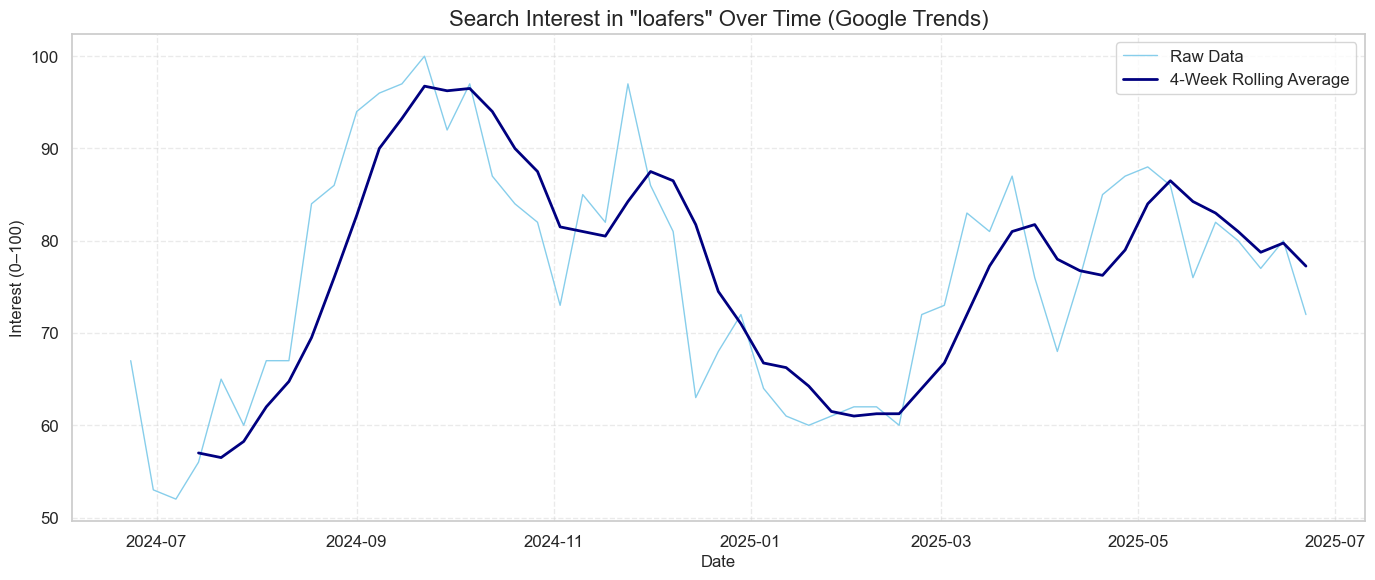

In [86]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=nyc_shoes, x='week', y='loafers', label = 'Raw Data', color = 'skyblue', linewidth=1)
sns.lineplot(data=nyc_shoes, x='week', y='rolling_average', label='4-Week Rolling Average', color='navy', linewidth=2)

plt.title('Search Interest in "loafers" Over Time (Google Trends)')
plt.ylabel('Interest (0–100)')
plt.xlabel('Date')
plt.legend()
plt.grid(True, linestyle='--', alpha = 0.4)
plt.tight_layout()
plt.show()

/var/folders/l7/b4bkrcjx6vnctwdl8m1cglnw0000gn/T/ipykernel_8222/1351330867.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month_name', y='loafers', data=monthly_avg, palette='Blues_d')


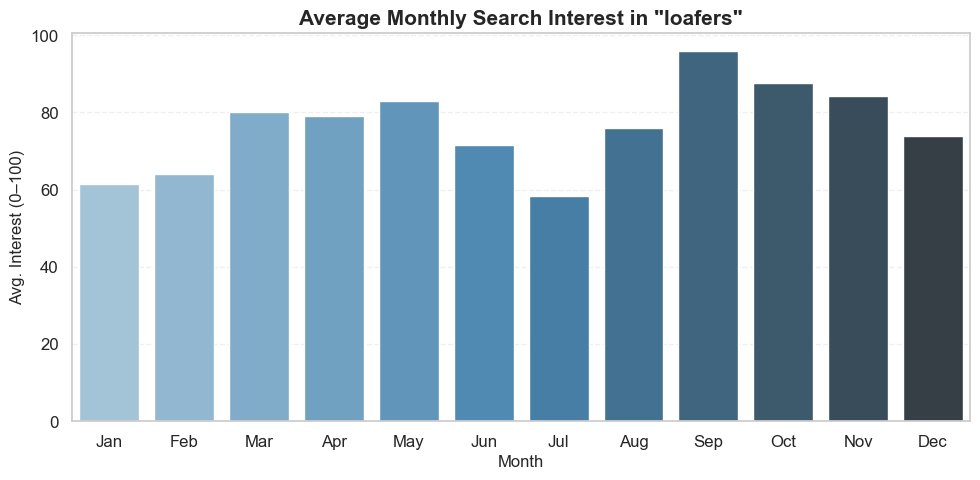

In [87]:
monthly_avg = nyc_shoes.groupby('month_name')['loafers'].mean().reindex(
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='month_name', y='loafers', data=monthly_avg, palette='Blues_d')

plt.title('Average Monthly Search Interest in "loafers"', fontsize=15, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Avg. Interest (0–100)')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


/var/folders/l7/b4bkrcjx6vnctwdl8m1cglnw0000gn/T/ipykernel_8222/1442245776.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='loafers', data=yearly_avg, palette='crest')


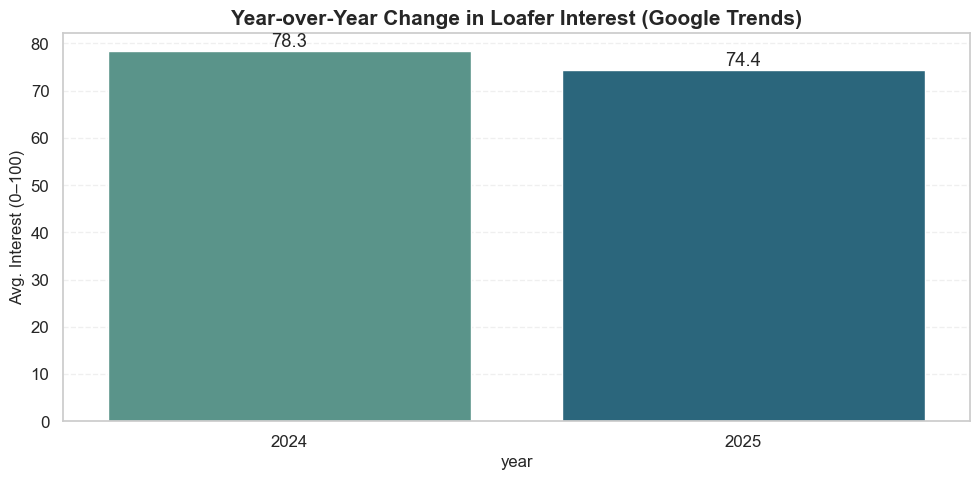

In [88]:
yearly_avg = nyc_shoes.groupby('year')['loafers'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='year', y='loafers', data=yearly_avg, palette='crest')

for i, row in yearly_avg.iterrows():
    plt.text(i, row['loafers'] + 1, f"{row['loafers']:.1f}", ha='center')

plt.title('Year-over-Year Change in Loafer Interest (Google Trends)', fontsize=15, fontweight='bold')
plt.xlabel('year')
plt.ylabel('Avg. Interest (0–100)')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


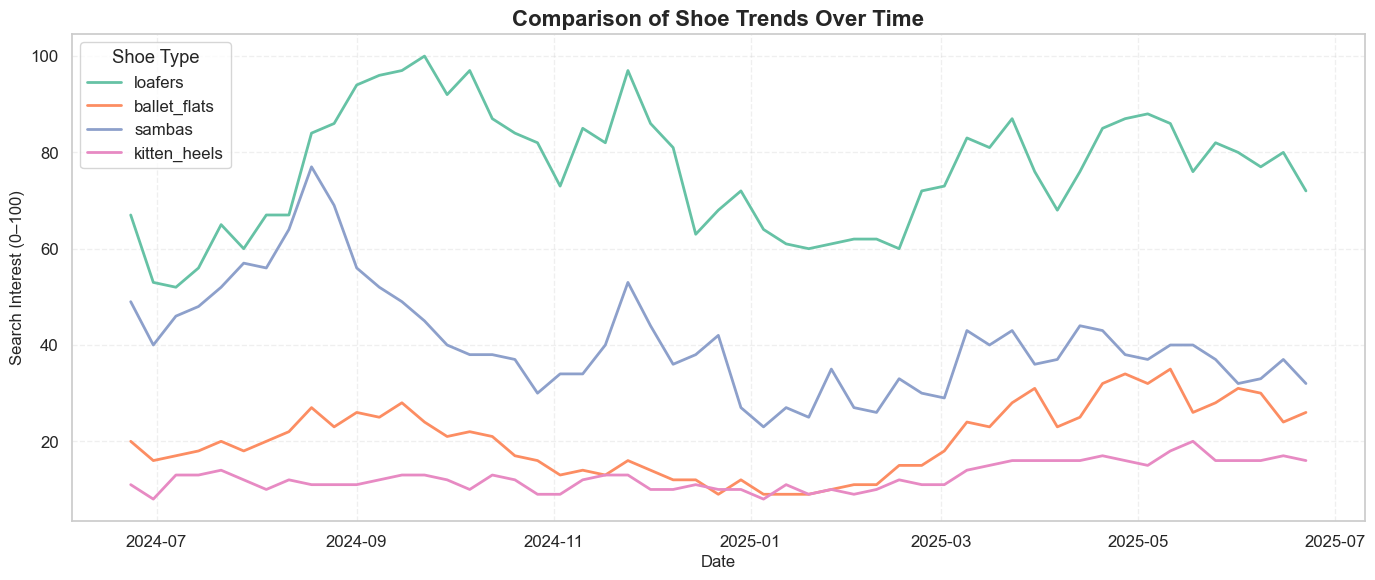

In [89]:
shoe_columns = ['loafers', 'ballet_flats', 'sambas', 'kitten_heels']
trends = nyc_shoes[['week'] + shoe_columns].melt(
    id_vars='week',
    var_name='shoe_type',
    value_name='interest'
)

# Ensure interest is numeric (just in case)
trends['interest'] = pd.to_numeric(trends['interest'], errors='coerce')

# Drop any rows with missing or invalid interest values
trends = trends.dropna(subset=['interest'])

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=trends, x='week', y='interest', hue='shoe_type', palette='Set2', linewidth=2)

plt.title('Comparison of Shoe Trends Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Search Interest (0–100)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(title='Shoe Type')
plt.tight_layout()
plt.show()
